#### Problem statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.


#### Objective
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Goals
-  The model will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
- The model will be a good way for management to understand the demand dynamics of a new market. 

In [532]:
# import libraries that we need

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,accuracy_score


In [539]:
# Importing dataset
df = pd.read_csv('day.csv')

In [424]:
# Looking at the first five rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Sanity Checks

In [425]:
# lets check the shape
df.shape

(730, 16)

In [426]:
# Lets check the for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [536]:
# Check for any duplicate entries
df.duplicated().sum()

0

In [427]:
# lets check the datatpyes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


Observations: 
- We can see that the dataset is of 730 rows and 16 columns.
- We see that there are no null values.

### EDA

In [428]:
# Lets print the data again
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [429]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Observations:
- Some of columns can be dropped or some column values can be replaced to categorical values.
- We can drop 
    - ->'instant': column index, won't add much value
    - ->'dteday': It won't add much value, since having year and month already
    - ->'casual','registered': As per problem statement, the total_count = casual+registered. So dropping due to High association and redundancy.

In [430]:
df.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

##### Season column

In [431]:
# get unique values for 'season'
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [432]:
# The 'season' column values can be mapped to categorical, as per daa dictionary given
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
# df['season'].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))


df['season'] = df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### mnth column, weekday column , weathersit column

In [433]:
# get unique values 
df['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [434]:
# get unique values
df['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [435]:
# get unique values
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

Observations:
- The way season was categorized, above mentioned columns can be categorized for better approach and as per data dictionary.

In [436]:
# categorize based on inferences given.
df['weathersit'] = df['weathersit'].replace({1:'Pleasant',2:'Moderate',3:'Poor',4:'Worse'})

df['mnth']= df['mnth'].replace({1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',
                  7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'})

                                            
## since first day of week is Sunday in US regions.                                            
df['weekday'] = df['weekday'].replace({0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'})
                                            
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


##### Outliers in Numeric variables

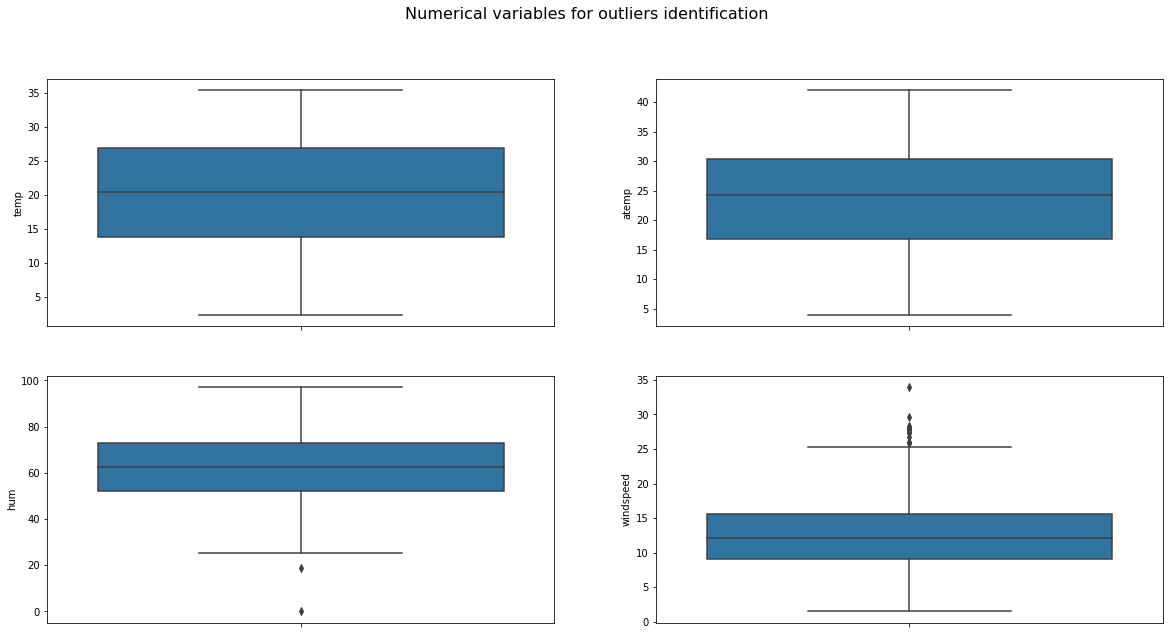

In [437]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(df['temp'],orient='vertical')
plt.subplot(2,2,2)
sns.boxplot(df['atemp'],orient='vertical')
plt.subplot(2,2,3)
sns.boxplot(df['hum'],orient='vertical')
plt.subplot(2,2,4)
sns.boxplot(df['windspeed'],orient='vertical')

plt.suptitle('Numerical variables for outliers identification', fontsize=16)
plt.show()


Observations:
- The 'temp','atemp' have no outliers.
- For 'hum' values can be near 0 also (practically possible)

##### Plotting categotical variables

In [438]:
# lets plot chart w.r.t. to target variables and categorical variables
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

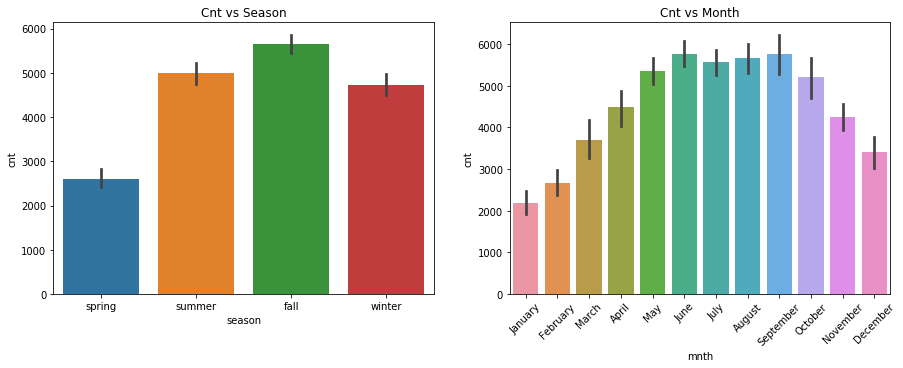

In [439]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(data = df, x='season',y='cnt')
plt.title('Cnt vs Season')

plt.subplot(1,2,2)
sns.barplot(data = df, x='mnth',y='cnt')
plt.title('Cnt vs Month')
plt.xticks(rotation=45)

plt.show()

- The Fall season has highest demand.
- During June to September, bike demand is more. During the year end the demand decreases, as it could be due to extereme     weather conditions.

In [440]:
df[df['season']=='fall']['mnth'].value_counts()

July         62
August       62
September    44
June         20
Name: mnth, dtype: int64

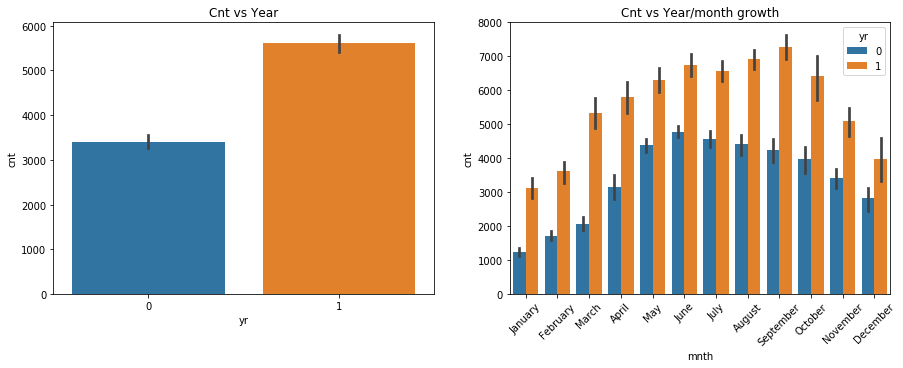

In [441]:
plt.figure(figsize=(15,5))

# 0=2018 and 1=2019

plt.subplot(1,2,1)
sns.barplot(data = df, x='yr',y='cnt')
plt.title('Cnt vs Year')

plt.subplot(1,2,2)
sns.barplot(data = df, x='mnth',y='cnt',hue='yr')
plt.title('Cnt vs Year/month growth')
plt.xticks(rotation=45)



plt.show()

Observations:
- We can see that the demand has increased for 2019 .
- Along with year-wise growth, month-wise and season-wise growth has been increasing for 2019.

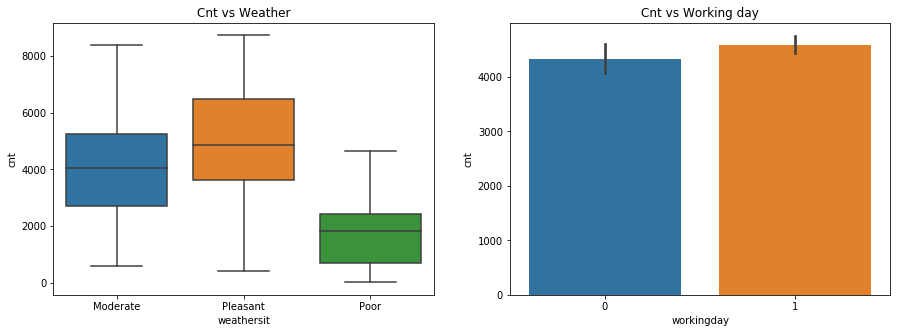

In [442]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x='weathersit',y='cnt')
plt.title('Cnt vs Weather')

plt.subplot(1,2,2)
sns.barplot(data = df, x='workingday',y='cnt')
plt.title('Cnt vs Working day')
plt.show()

Observations:
- We can see that most demand has been for Pleasant weather.
- The same with Working day.

##### Correlation

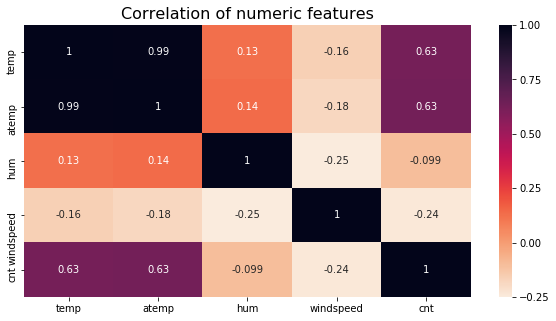

In [443]:
# checking for numerical features trying to establish any coorelation or linear relationship.

num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(10,5))
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(df[num_features].corr(),annot= True,cmap="rocket_r")
plt.show()

##### Plotting pairplot for numeric variables

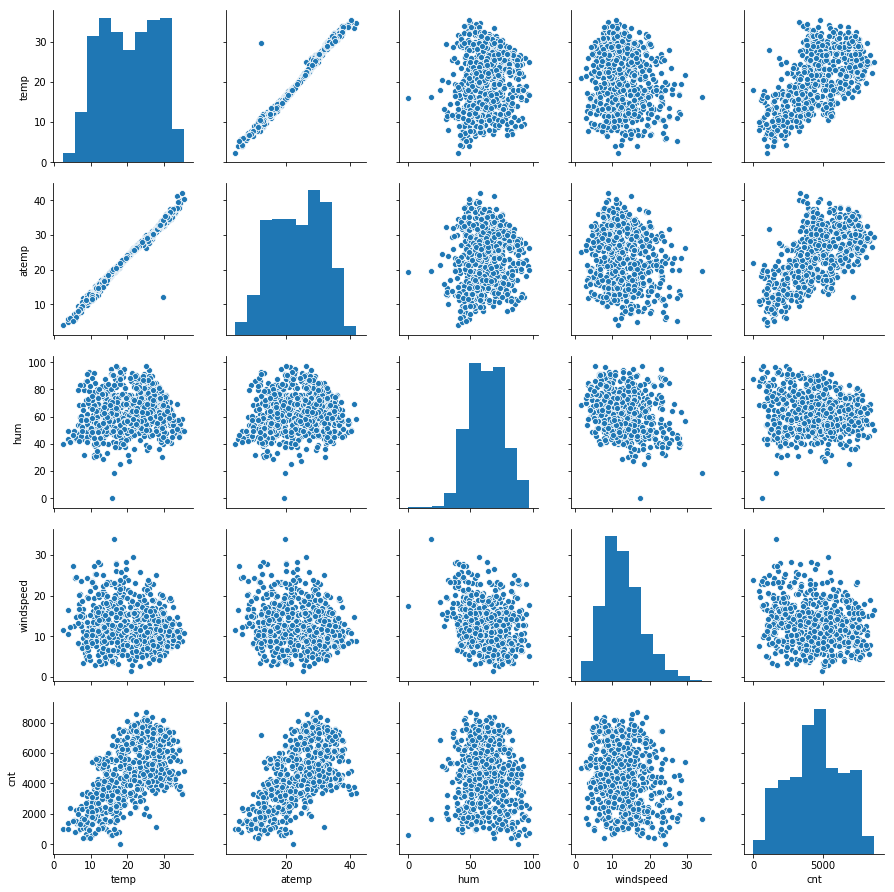

In [540]:
sns.pairplot(df[num_features])

Observations:
- We see that 'atemp' and 'temp' are highly correlated and can be redundant, so we need to drop one of it i.e multicolinearity issue
- Windspeed and cnt are negatively correlated , i.e if Windspeed decrease , demand increases.

In [444]:
df.drop(['atemp'], axis = 1, inplace = True)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [445]:
df_full = df
col_num = ['temp', 'hum', 'windspeed', 'cnt']
col_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']

### Data preparation

Create dummy variables:- Dummy variables are a way of incorporating qualitative information into regression analysis. Qualitative data, unlike continuous data, tell us simply whether the individual observation belongs to a particular category.

In [446]:
# Create dummy variables for all categorical variables
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [447]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Moderate', 'weathersit_Pleasant',
       'weathersit_Poor'],
      dtype='object')

### Train test data split

In [513]:
# Splitting train and test data and set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [449]:
# getting train and test shapes
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Scaling

Rescale the variables so that they have a comparable scale. We need to make sure that all the variables come under same plane else some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.

We will proceed with MinMaxScaler. It will scale all values between 0 and 1.

In [450]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Moderate', 'weathersit_Pleasant',
       'weathersit_Poor'],
      dtype='object')

In [451]:
scaler = MinMaxScaler()

In [452]:
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Moderate,weathersit_Pleasant,weathersit_Poor
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,1,0,0


### Splitting target and independent variables

In [453]:
y_train = df_train.pop('cnt')
X_train = df_train

Since we have scaled numeric variables and have columns, we now can proceed for feature selection using RFE and then manual elimination approach

### Feature Selection

##### 1.RFE 

In [454]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)  ## starting with 20 columns           
rfe = rfe.fit(X_train, y_train)

In [455]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 2),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 9),
 ('mnth_March', False, 10),
 ('mnth_May', True, 1),
 ('mnth_November', True, 1),
 ('mnth_October', False, 6),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 4),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 3),
 ('weekday_Thursday', False, 7),
 ('weekday_Tuesday', False, 5),
 ('weekday_Wednesday', False, 8),
 ('weathersit_Moderate', True, 1),
 ('weathersit_Pleasant', True, 1),
 ('weathersit_Poor', True, 1)]

In [456]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_May',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Moderate', 'weathersit_Pleasant', 'weathersit_Poor'],
      dtype='object')

Observations:
- The RFE has given top 20 columns

In [457]:
# using columns that are selected by RFE method
X_train_rfe = X_train[col] 

In [458]:
# fit a constant because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.
X_train_sm = sm.add_constant(X_train_rfe)

# Using Ordinary Least Square method to fit the training data
lr = sm.OLS(y_train, X_train_sm).fit()


In [459]:
# Coeffecients for each variable
lr.params

const                  0.144782
yr                     0.231718
holiday               -0.049101
workingday             0.044188
temp                   0.450043
hum                   -0.152140
windspeed             -0.186827
season_spring         -0.055985
season_summer          0.026943
season_winter          0.101177
mnth_December         -0.050630
mnth_February         -0.035453
mnth_January          -0.065822
mnth_July             -0.051200
mnth_May               0.025018
mnth_November         -0.048339
mnth_September         0.071750
weekday_Saturday       0.054674
weathersit_Moderate    0.093780
weathersit_Pleasant    0.153699
weathersit_Poor       -0.102698
dtype: float64

In [460]:
# summary of the fitted model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          1.59e-189
Time:                        13:48:17   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1448      0.031      4.641      0.000       0.083       0.206
yr                      0.2317      0.008     29.150      0.000       0.216       0.247
holiday                -0.0491      0.027     -1.827      0.068      -0.102       0.004
workingday              0.0442      0.011      3.868      0.000       0.022       0.067
temp                    0.4500      0.038     11.796      0.000       0.375       0.525
hum                    -0.1521      0.038     -4.055      0.000      -0.226      -0.078
windspeed              -0.1868      0.025     -7.365      0.000      -0.237      -0.137
season_spring          -0.0560      0.022     -2.563      0.011      -0.099      -0.013
season_summer           0.0269      0.017      1.593      0.112      -0.006       0.060
season_winter           0.1012      0.018      5.705      0.000       0.066       0.136
mnth_December          -0.0506      0.018     -2.807      0.005      -0.086      -0.015
mnth_February          -0.0355      0.021     -1.661      0.097      -0.077       0.006
mnth_January           -0.0658      0.021     -3.110      0.002      -0.107      -0.024
mnth_July              -0.0512      0.018     -2.858      0.004      -0.086      -0.016
mnth_May                0.0250      0.017      1.449      0.148      -0.009       0.059
mnth_November          -0.0483      0.019     -2.592      0.010      -0.085      -0.012
mnth_September          0.0718      0.017      4.324      0.000       0.039       0.104
weekday_Saturday        0.0547      0.014      3.796      0.000       0.026       0.083
weathersit_Moderate     0.0938      0.013      7.227      0.000       0.068       0.119
weathersit_Pleasant     0.1537      0.011     13.773      0.000       0.132       0.176
weathersit_Poor        -0.1027      0.022     -4.619      0.000      -0.146      -0.059
==============================================================================
Omnibus:                       84.215   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.321
Skew:                          -0.792   Prob(JB):                     3.96e-53
Kurtosis:                       5.974   Cond. No.                     1.41e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.55e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [461]:
# list of initial 20 columns
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_May',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Moderate', 'weathersit_Pleasant', 'weathersit_Poor'],
      dtype='object')

In [462]:
# writing the function for model summary

def get_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [463]:
# writing the function for VIF summary

from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Model 0 : Starting with 20 columsn as per RFE

In [464]:
get_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          1.59e-189
Time:                        13:48:17   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1448    

Observations: 
- We can drop 'mnth_May' as its p value is greater than 0.05.

### Model 1 attempt

In [465]:
col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Moderate', 'weathersit_Pleasant', 'weathersit_Poor']
get_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          3.55e-190
Time:                        13:48:18   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1359    

Observations:
- We can drop 'mnth_February' as its p value is greater than 0.05.

### Model 2

In [466]:
# removed 'mnth_February'
col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Moderate', 'weathersit_Pleasant', 'weathersit_Poor']
get_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          9.55e-191
Time:                        13:48:18   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1277    

Observations :
- We can drop 'holiday' as its p value is greater than 0.05.

### Model 3

In [467]:
# removed 'holiday'
col = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Moderate', 'weathersit_Pleasant', 'weathersit_Poor']
get_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          4.53e-191
Time:                        13:48:18   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1229    

Observation:
- Lets drop 'mnth_December' and check if it affects the model

### Model 4

In [468]:
# removed 'mnth_December'
col = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
        'mnth_September', 'weekday_Saturday',
       'weathersit_Moderate', 'weathersit_Pleasant', 'weathersit_Poor']
get_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          8.51e-192
Time:                        13:48:18   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0966    

Observations:
- We can drop 'weather_Pleasant' since its VIF is high and check if any changes.

### Model 5

In [469]:
#removed 'weather_Pleasant'
col = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
        'mnth_September', 'weekday_Saturday',
       'weathersit_Moderate', 'weathersit_Poor']
get_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          8.51e-192
Time:                        13:48:18   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2298    

Observations:
- We can drop 'hum' since its VIF is high and check if any changes.

### Model 6

In [470]:
# removed 'hum'
col = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
        'mnth_September', 'weekday_Saturday',
       'weathersit_Moderate', 'weathersit_Poor']
get_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          3.28e-189
Time:                        13:48:18   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1493    

Observations:
- We can drop 'temp' since its VIF is high and check if any changes.

### Model 7

In [472]:
#removed temp
col = ['yr', 'workingday', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
        'mnth_September', 'weekday_Saturday',
       'weathersit_Moderate', 'weathersit_Poor']
get_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     149.8
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          4.11e-150
Time:                        13:48:18   Log-Likelihood:                 410.99
No. Observations:                 510   AIC:                            -798.0
Df Residuals:                     498   BIC:                            -747.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5338    

Observation:
- The overall model is detoriating suddenly when temp is removed. We need to adjust other variables for temp.
- Additionally temp has better linear relation with target, so we cannot remove it abruptly
- Lets try removing workingday, season_summer, weekday_Saturday.

### Model 8

In [508]:
# removing workingday, season_summer, weekday_Saturday.
col = ['yr', 'temp', 'windspeed',
       'season_spring','mnth_September', 'season_winter', 'mnth_July', 
       'weathersit_Moderate', 'weathersit_Poor']
get_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.7
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          6.95e-185
Time:                        13:54:43   Log-Likelihood:                 487.60
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     500   BIC:                            -912.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2503    

Finally ! Perfect !! We got the final model, variables and all are under ratio

y = 0.0753 + 0.2345 * X_train['yr'] + 0.4521 * X_train['temp'] + (-0.1415) * X_train['windspeed'] + 0.0444 * X_train['season_winter'] + 0.0540 * X_train['mnth_September'] + (-0.0794) * X_train['weathersit_Moderate'] + (-0.2822) * X_train['weathersit_Poor'] + (-0.0718) * X_train['mnth_July'] + (-0.1136) * X_train['season_spring']

##### lets plot the pred line

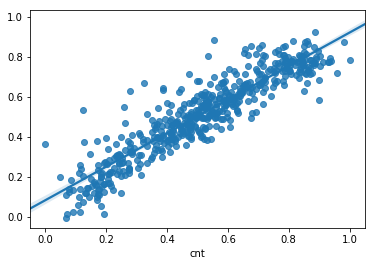

In [474]:
sns.regplot(y_train, 0.0753 + 0.2331*X_train['yr'] + 0.0563*X_train['workingday'] + 0.5499*X_train['temp'] + (-0.1552)*X_train['windspeed'] + 0.0874*X_train['season_summer'] + 0.1318*X_train['season_winter']+ 0.0972*X_train['mnth_September'] + 0.0677*X_train['weekday_Saturday'] + (-0.0813)*X_train['weathersit_Moderate'] + (-0.2880)*X_train['weathersit_Poor'])

Observation:
- The reg line is fitting quite good on the actuals.

### Statsapi model

##### 1.Predcition on Training set 

In [509]:
col = ['yr', 'temp', 'windspeed',
       'season_spring','mnth_September', 'season_winter', 'mnth_July', 
       'weathersit_Moderate', 'weathersit_Poor']


X_train_sm = sm.add_constant(X_train[col]) # add constant
lm = sm.OLS(y_train, X_train_sm).fit() # fitting on train data

y_train_pred= lm.predict(X_train_sm) # predicition on train data

##### Calculating r2 score, residuals analysis and plotting it

In [510]:
res = y_train-y_train_pred

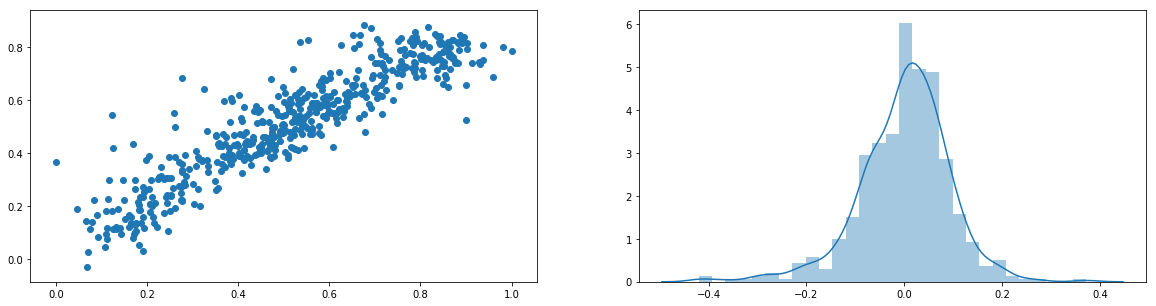

In [511]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(y_train, y_train_pred)
plt.subplot(1,2,2)
sns.distplot(res)

Observations:

- The scatter plot shows good linearity for actuals and prediction.
- The error terms are normally distributed and center is around 0.

##### r2 score on training set

In [512]:
r2_score(y_train,y_train_pred)

0.8281510783498702

Observations:
- The r2 score on the train data is 0.8281510783498702 or approx <b>82.81%

##### Lets predict now on Test data

In [493]:
num_vars = ['temp','hum','windspeed','cnt']

In [514]:
df_test[num_vars] = scaler.transform(df_test[num_vars]) # note we only transform the test data

y_test = df_test.pop('cnt')
X_test = df_test

In [516]:
col = ['yr', 'temp', 'windspeed',
       'season_spring','mnth_September', 'season_winter', 'mnth_July', 
       'weathersit_Moderate', 'weathersit_Poor']
X_test = X_test[col]

In [517]:
X_test_sm = sm.add_constant(X_test) # add constant

y_test_pred= lm.predict(X_test_sm) # predicition on test data

##### plotting the residual analysis ,error terms and checking linear relationship


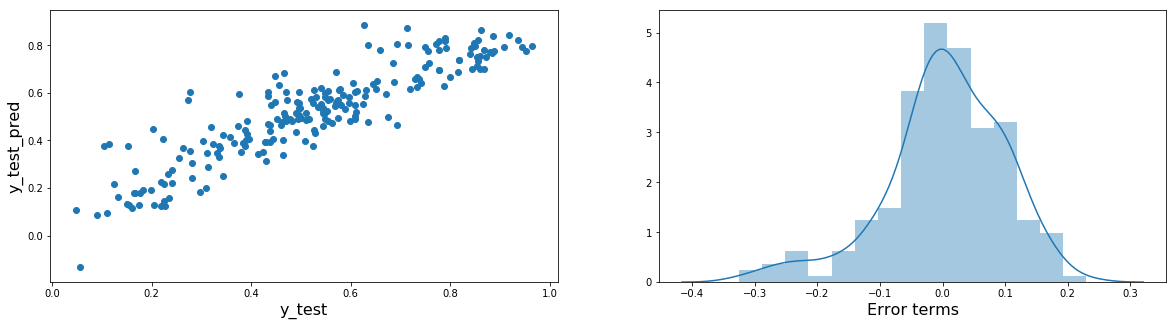

In [529]:
res = y_test-y_test_pred # calculating residuals

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test',fontsize=16)
plt.ylabel('y_test_pred',fontsize=16)


plt.subplot(1,2,2)
sns.distplot(res)
plt.xlabel('Error terms', fontsize=16)

plt.show()

Observations:

- The scatter plot shows good linearity for actuals and prediction.
- The error terms are normally distributed and center is around 0.

##### r2 score test data

In [518]:
r2_score(y_test,y_test_pred)

0.8064311297679315

Observations:
- The r2 score on the train data is 0.8064311297679315 or approx <b>80.64%</b>
- The test score is under 5% of training score. The model is valid.

In [546]:
# model params

lm.params

const                  0.250286
yr                     0.234489
temp                   0.452098
windspeed             -0.141469
season_spring         -0.113587
mnth_September         0.053996
season_winter          0.044399
mnth_July             -0.071796
weathersit_Moderate   -0.079427
weathersit_Poor       -0.282231
dtype: float64

##### Conclusion:
- The model has figured out best variables that are significant for the business goals to achieve.

- The columns for overall picture are as below:
    - Year
    - Temperature
    - windspeed
    - Season
    - Month
    - Weather
    
- The columns from the models for predictive analysis are :
    - col = ['yr',  'temp',  'windspeed',  'season_spring',  'mnth_September',  'season_winter',  'mnth_July', 'weathersit_Moderate',  'weathersit_Poor']
    
    
- From the data provided for 2018 and 2019, we can expect the demand to be on increasing side once the situation gets back to normal

- Company should improve and focus on Season: Spring and Winter. 
- Company can introduce new offers in months from February till June to increase their demands, such as Summer offers and high discounts.
- Due to Snow and unfavourable weather, it is likely that demand would be low for winters. For that, the company can lower the prices or introduce Christmas/New year offers to boost demands.
- Company should maintain efforts on best months for demands (June to October).